<a href="https://colab.research.google.com/github/prosperochuko-sudo/Grouped-data-with-pandas-and-matplotlib-/blob/main/Data_grouping_with_pandas_and_visualization_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

wrote file at: freelance_project.csv
         Date   Product  Units Sold  Revenue (USD)         Region Customer Age Group
0  2025-01-15  Widget A         120           2400  North America              18-24
1  2025-02-20  Widget B          85           1700         Europe              25-34
2  2025-03-10  Widget C         200           4000           Asia              35-44
3  2025-04-05  Widget A         150           3000  North America              45-54
4  2025-05-18  Widget D          95           1900  South America              18-24
5  2025-06-22  Widget B         110           2200         Europe              25-34
6  2025-07-30  Widget C         180           3600           Asia              35-44
7  2025-08-12  Widget A         130           2600  North America              45-54
8  2025-09-25  Widget D         105           2100  South America                55+
['Date', 'Product', 'Units Sold', 'Revenue (USD)', 'Region', 'Customer Age Group']
               Revenue (USD)  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

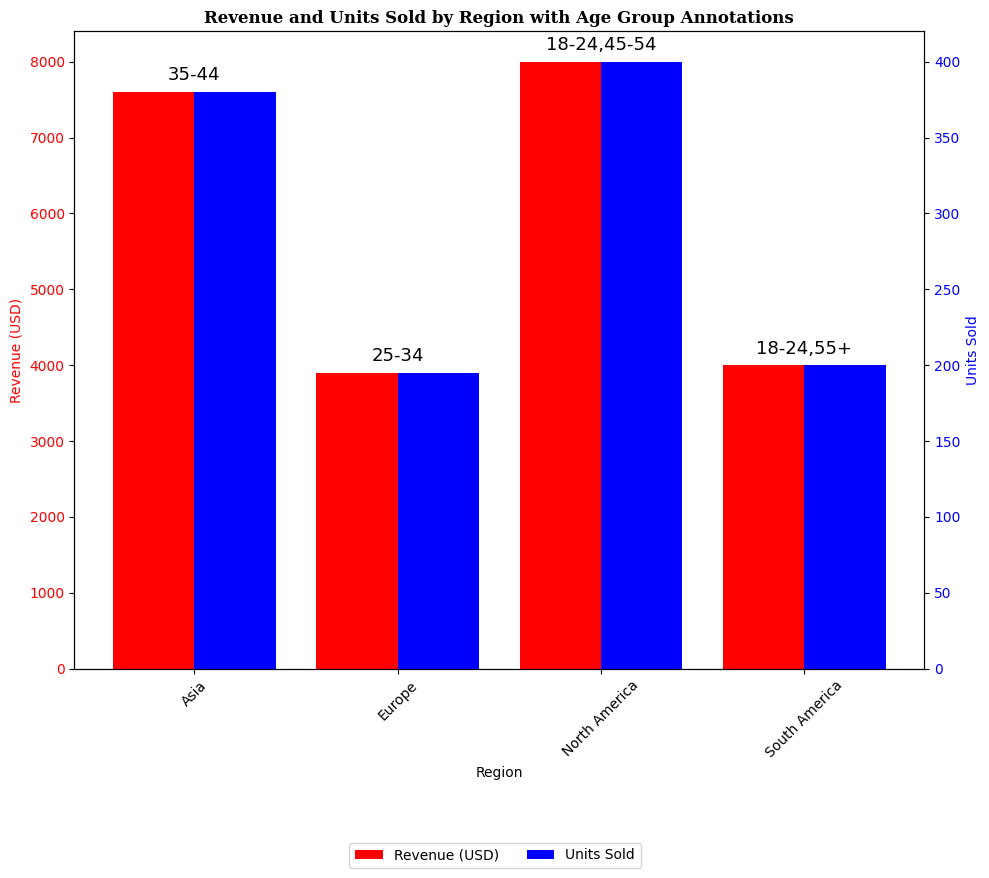

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from openpyxl.styles import Font
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from google.colab import files  # Add this for downloading files

try:
    path = "freelance_project.csv"  # Use relative path in Colab
    with open(path, 'w', encoding='utf-8') as f:
        f.write("""Date,Product,Units Sold,Revenue (USD),Region,Customer Age Group
2025-01-15,Widget A,120,2400,North America,18-24
2025-02-20,Widget B,85,1700,Europe,25-34
2025-03-10,Widget C,200,4000,Asia,35-44
2025-04-05,Widget A,150,3000,North America,45-54
2025-05-18,Widget D,95,1900,South America,18-24
2025-06-22,Widget B,110,2200,Europe,25-34
2025-07-30,Widget C,180,3600,Asia,35-44
2025-08-12,Widget A,130,2600,North America,45-54
2025-09-25,Widget D,105,2100,South America,55+""")
    print("wrote file at:", path)
    #files.download(path)  # Download the CSV (optional, if you want it locally)
except Exception as e:
    print("csv file writing error:", e)

try:
    df = pd.read_csv(path)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', 1000)
    print(df)
    print(df.columns.to_list())
    grouped = df.groupby("Region").agg({"Revenue (USD)": "sum", "Units Sold": "sum", "Customer Age Group": lambda x: ','.join(sorted(x.unique()))})
    print(grouped)
except Exception as e:
    print("data grouping error:", e)

try:
    # Extract data for plotting
    regions = grouped.index
    revenue = grouped['Revenue (USD)']
    units_sold = grouped['Units Sold']
    age_groups = grouped['Customer Age Group']

    # Set up the figure and axes for dual y-axis
    fig, ax1 = plt.subplots(figsize=(10, 8))  # Create a figure and primary axis

    # Parameters for bar positions
    bar_width = 0.40  # Width of each bar
    index = np.arange(len(regions))  # Numeric indices for regions (0, 1, 2, 3)

    # Plot bars for Revenue (USD) on primary y-axis (left)
    bars1 = ax1.bar(index, revenue, bar_width, label='Revenue (USD)', color='red')
    ax1.set_xlabel('Region')  # Label for x-axis
    ax1.set_ylabel('Revenue (USD)', color='red')  # Label for left y-axis
    ax1.tick_params(axis='y', labelcolor='red')  # Color y-axis ticks red

    # Create secondary y-axis for Units Sold
    ax2 = ax1.twinx()
    bars2 = ax2.bar(index + bar_width, units_sold, bar_width, label='Units Sold', color='blue')
    ax2.set_ylabel('Units Sold', color='blue')  # Label for right y-axis
    ax2.tick_params(axis='y', labelcolor='blue')  # Color y-axis ticks blue

    # Add annotations for Customer Age Group above the bars
    for i, region in enumerate(regions):
        # Get the height of the taller bar (revenue or units sold scaled to ax1)
        revenue_height = revenue.iloc[i]
        units_height = units_sold.iloc[i] * (ax1.get_ylim()[1] / ax2.get_ylim()[1])  # Scale units to ax1
        max_height = max(revenue_height, units_height)  # Use taller bar for annotation
        ax1.text(i + bar_width / 2, max_height + 100, age_groups.iloc[i],
                 ha='center', va='bottom', fontsize=13, wrap=True)

    # Set x-axis ticks and labels
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(regions, rotation=45)

    # Add title
    plt.title('Revenue and Units Sold by Region with Age Group Annotations', fontsize=12, fontweight="bold", family="serif")

    # Add legend (manual handles since we used twin axes)
    fig.legend(
        handles=[bars1, bars2],
        labels=['Revenue (USD)', 'Units Sold'],
        loc='lower center',
        bbox_to_anchor=(0.5, -0.10),
        ncol=2
    )

    # Adjust layout to prevent overlap
    fig.tight_layout()
    # Save plot as PNG (suitable for exporting or inserting in Excel)
    chart_path = "revenue_units_chart.JPG"  # Relative path
    plt.savefig(chart_path, dpi=300, bbox_inches='tight')
    # plt.show()  # Uncomment this if you want to preview the chart inline in Colab
    #files.download(chart_path)  # Download the PNG
except Exception as e:
    print("chart plotting error:", e)

# Export grouped data to Excel
try:
    excel_path = 'project_grouped_data.xlsx'  # Relative path
    grouped.to_excel(excel_path, index= True, startrow=1, engine='openpyxl')  # Export with row indices
    # Insert the chart image into the Excel file
    wb = load_workbook(excel_path)  # Load the existing Excel file
    ws = wb.active  # Select the active sheet (where the data is)
    # Add a title or note in Excel for professionalism (optional)
    ws['A1'] = 'Grouped Data Table'  # Overwrite A1 with a header (data starts at A2 now)
    ws.merge_cells('A1:E1')  # Merge cells for the header
    ws['A1'].font = Font(bold=True, size=14)  # Bold and larger font
    last_row= ws.max_row + 1
    ws.cell(row= last_row, column= 1).value="note:Grouped data by Regions. Chart shows revenue(red) and units sold(blue) with age group annotations"
    ws.merge_cells(start_row=last_row, start_column= 1,end_row= last_row, end_column=10)
    img = Image(chart_path)  # Load the PNG image
    ws.add_image(img, 'A10')  # Insert image starting at cell F2 (next to the table)
    img.width= 500
    img.height= 300
    wb.save(excel_path)  # Save the updated Excel file
    print(f"Excel file created at: {excel_path}")
    files.download(excel_path)  # Download the Excel file
    plt.show()
except Exception as e:
    print("excel file error:", e)